In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
LD_df = pd.read_pickle("LD/ML_DATASET_LD.pkl")
LD_df['Species']='L. donovani'
TC_df = pd.read_pickle("TC/ML_DATASET_TC.pkl")
TC_df['Species']='T. cruzi'
TB_df = pd.read_pickle("TB/ML_DATASET_TB.pkl")
TB_df['Species']='T. brucei'



In [3]:
df = pd.concat([
    TB_df[['sequence_3p', 'TE', 'Species']],
    TC_df[['sequence_3p', 'TE', 'Species']],
    LD_df[['sequence_3p', 'TE', 'Species']] ])
df.head()  

,sequence_3p,TE,Species
Tb927.3.5260,TGAACAGTTGTGAAGTTAGGACGGGGCGTATGTTGCCTTCCTTTTG...,0.271235,T. brucei
Tb927.3.5270,AGTGGGCTAACAAACACGGTAGTCGCAACGATAATAACATCGAGCT...,0.254334,T. brucei
Tb927.3.5280,TTGGTGTGGGAGAGAATGATTCTAAATGACAAGGGCTGATCATGTG...,0.295944,T. brucei
Tb927.3.5290,ATGCGTTGAAGAAGGAGAAGCGAATTTTAAGTTTCATGAGTGTGGT...,0.246070,T. brucei
Tb927.3.5300,TGCTATTGGTAGCATTTTCGTTGTTTCATTTCGTAACCTCCTTGAG...,0.503378,T. brucei


In [4]:
df2 = pd.concat([
    TB_df[['mean_rna','Species']].rename({'mean_rna':'rna_counts'},axis=1),
    TC_df[['rna_counts','Species']],
    LD_df[['rna_counts','Species']] ])

df2['rna_counts_bk']=df2['rna_counts'].copy()
df2.head()
df2['rna_counts']=np.log10(df2['rna_counts'])
df2.head()

,rna_counts,Species,rna_counts_bk
Tb927.3.5260,1.661351,T. brucei,45.851210
Tb927.3.5270,2.114293,T. brucei,130.104802
Tb927.3.5280,2.133356,T. brucei,135.942838
Tb927.3.5290,1.544094,T. brucei,35.002112
Tb927.3.5300,1.814141,T. brucei,65.183926


In [5]:
df2=df.join(df2[['rna_counts']])

In [6]:
df2['len_3p']=np.log10(df2['sequence_3p'].str.len())
df2['len_3bp']=df2['sequence_3p'].str.len()
df2.head()

,sequence_3p,TE,Species,rna_counts,len_3p,len_3bp
Tb927.3.5260,TGAACAGTTGTGAAGTTAGGACGGGGCGTATGTTGCCTTCCTTTTG...,0.271235,T. brucei,1.661351,2.617000,414
Tb927.3.5270,AGTGGGCTAACAAACACGGTAGTCGCAACGATAATAACATCGAGCT...,0.254334,T. brucei,2.114293,2.531479,340
Tb927.3.5280,TTGGTGTGGGAGAGAATGATTCTAAATGACAAGGGCTGATCATGTG...,0.295944,T. brucei,2.133356,2.589950,389
Tb927.3.5290,ATGCGTTGAAGAAGGAGAAGCGAATTTTAAGTTTCATGAGTGTGGT...,0.246070,T. brucei,1.544094,2.664642,462
Tb927.3.5300,TGCTATTGGTAGCATTTTCGTTGTTTCATTTCGTAACCTCCTTGAG...,0.503378,T. brucei,1.814141,2.423246,265


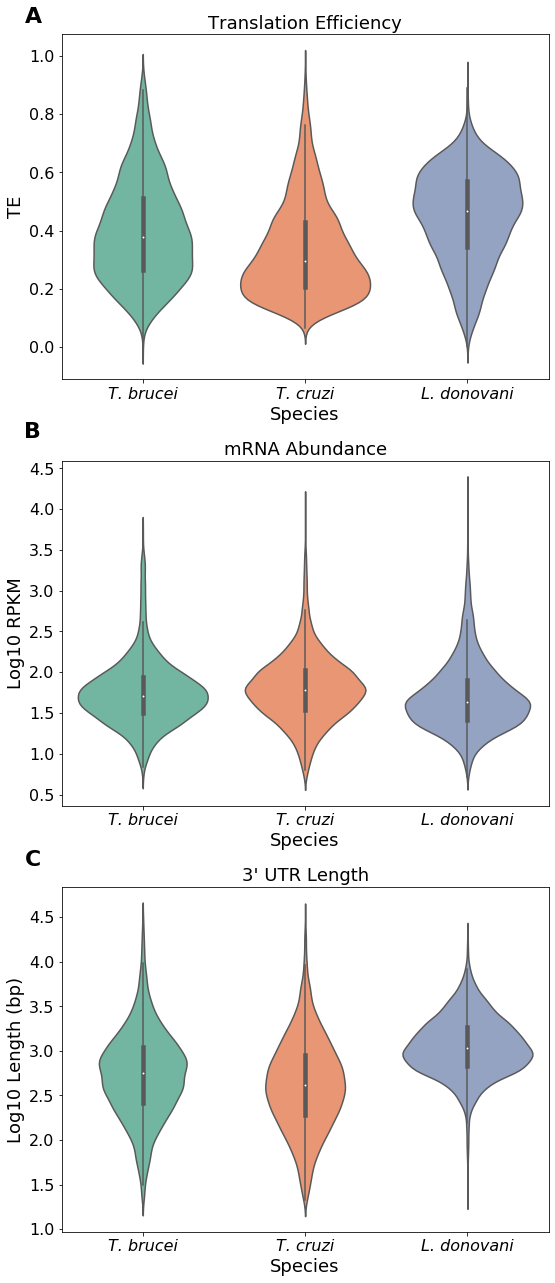

In [7]:
plt.rcParams.update({'font.size': 16})
fig,axes=plt.subplots( figsize=(8,18) , nrows=3)

sns.violinplot(data=df2,y='TE',x='Species',ax=axes[0],  palette='Set2')
axes[0].set_title('Translation Efficiency',fontsize=18)
axes[0].set_ylabel('TE',fontsize=18)
axes[0].set_xlabel('Species',fontsize=18)
axes[0].set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic')
#axes[0].text(-0.8, 1.1, 'A', fontsize=18, weight='bold')

sns.violinplot(data=df2,y='rna_counts',x='Species',ax=axes[1],  palette='Set2')
axes[1].set_ylabel('Log10 RPKM',fontsize=18)
axes[1].set_title('mRNA Abundance',fontsize=18)
axes[1].set_xlabel('Species',fontsize=18)
axes[1].set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic')
#axes[1].text(-0.8, 1.1, 'B', fontsize=18, weight='bold')

sns.violinplot(data=df2,y='len_3p',x='Species',ax=axes[2], palette='Set2')
axes[2].set_ylabel('Log10 Length (bp)',fontsize=18)
axes[2].set_title("3' UTR Length",fontsize=18)
axes[2].set_xlabel('Species',fontsize=18)
axes[2].set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic')
#axes[2].text(-0.8, 1.1, 'C', fontsize=18, weight='bold')

fig.text(0.06, 0.98,  'A', fontsize=22, weight='bold')
fig.text(0.06, 0.66,  'B', fontsize=22, weight='bold')
fig.text(0.06, 0.33,  'C', fontsize=22, weight='bold')

plt.tight_layout()
plt.savefig('Fig 1B.svg')
plt.savefig('Fig 1B.png')
plt.show()

In [8]:
cols=['sequence_3p', 'Species','utr_3_count_A', 'utr_3_count_T', 'utr_3_count_C', 'utr_3_count_G',
      'third_base_A', 'third_base_T', 'third_base_G', 'third_base_C',]

In [9]:
df = pd.concat([
    TB_df[cols],
    TC_df[cols],
    LD_df[cols]])
df.head()  

,sequence_3p,Species,utr_3_count_A,utr_3_count_T,utr_3_count_C,utr_3_count_G,third_base_A,third_base_T,third_base_G,third_base_C
Tb927.3.5260,TGAACAGTTGTGAAGTTAGGACGGGGCGTATGTTGCCTTCCTTTTG...,T. brucei,0.173913,0.451691,0.200483,0.173913,0.097163,0.092908,0.081560,0.061702
Tb927.3.5270,AGTGGGCTAACAAACACGGTAGTCGCAACGATAATAACATCGAGCT...,T. brucei,0.205882,0.379412,0.200000,0.214706,0.085890,0.092025,0.102249,0.053170
Tb927.3.5280,TTGGTGTGGGAGAGAATGATTCTAAATGACAAGGGCTGATCATGTG...,T. brucei,0.192802,0.406170,0.177378,0.223650,0.064350,0.102960,0.078507,0.087516
Tb927.3.5290,ATGCGTTGAAGAAGGAGAAGCGAATTTTAAGTTTCATGAGTGTGGT...,T. brucei,0.190476,0.359307,0.229437,0.220779,0.080423,0.089242,0.102293,0.061376
Tb927.3.5300,TGCTATTGGTAGCATTTTCGTTGTTTCATTTCGTAACCTCCTTGAG...,T. brucei,0.181132,0.362264,0.264151,0.192453,0.071291,0.055877,0.131021,0.075145


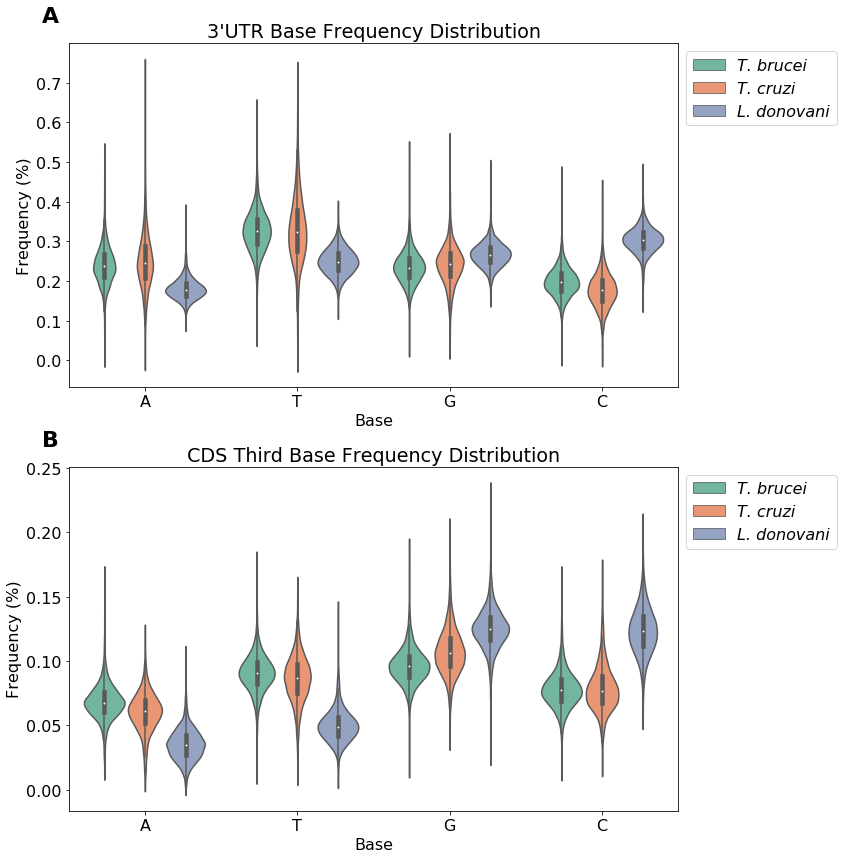

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
fig,axes=plt.subplots( figsize=(12,12) , nrows=2)
ax = axes[0]
melted_df = pd.melt(df, 
                    id_vars=['sequence_3p', 'Species'],
                    value_vars=['utr_3_count_A', 'utr_3_count_T', 'utr_3_count_G', 'utr_3_count_C'],
                    var_name='Base',
                    value_name='frequency')

# Clean base names by removing '_freq'
melted_df['Base'] = melted_df['Base'].str.replace('utr_3_count_', '')
sns.violinplot(data=melted_df, x='Base', y='frequency', hue='Species',  palette='Set2',ax=ax)
ax.set_title("3'UTR Base Frequency Distribution")
ax.set_ylabel('Frequency (%)')
#ax.set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic')
# Italicize species names
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
legend = ax.get_legend()
for t in legend.get_texts():
   t.set_style('italic')


ax = axes[1]
# Melt the dataframe
melted_df = pd.melt(df, 
                    id_vars=['sequence_3p', 'Species'],
                    value_vars=['third_base_A', 'third_base_T', 'third_base_G', 'third_base_C'],
                    var_name='Base',
                    value_name='frequency')

# Clean base names by removing '_freq'
melted_df['Base'] = melted_df['Base'].str.replace('third_base_', '')
sns.violinplot(data=melted_df, x='Base', y='frequency', hue='Species',  palette='Set2',ax=ax)
ax.set_title('CDS Third Base Frequency Distribution')
ax.set_ylabel('Frequency (%)')
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

legend = ax.get_legend()
for t in legend.get_texts():
   t.set_style('italic')

fig.text(0.06, 0.98,  'A', fontsize=22, weight='bold')
fig.text(0.06, 0.49,  'B', fontsize=22, weight='bold')
plt.tight_layout()
plt.show()

In [11]:
0

0

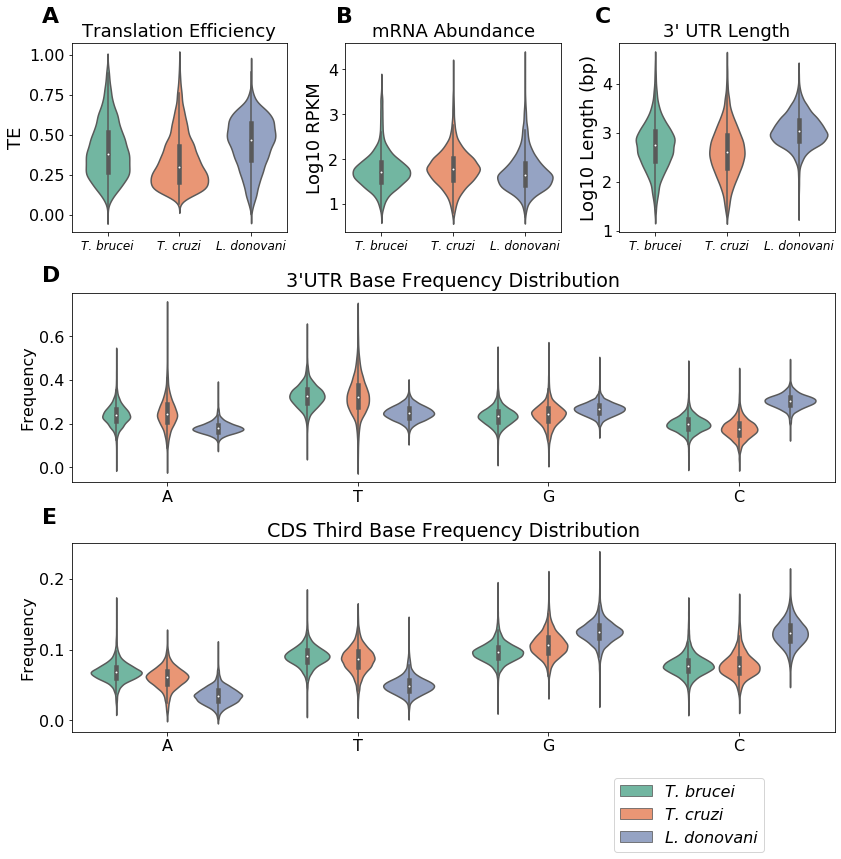

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create figure
fig = plt.figure(figsize=(12, 12))  # Made wider to accommodate 3 panels in first row

# Create grid specification
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 1])

# Create axes
axes = []
# First row - three panels
axes.append(fig.add_subplot(gs[0, 0]))  # ax[0]
axes.append(fig.add_subplot(gs[0, 1]))  # ax[1]
axes.append(fig.add_subplot(gs[0, 2]))  # ax[2]
# Second row - one panel spanning all columns
axes.append(fig.add_subplot(gs[1, :]))  # ax[3]
# Third row - one panel spanning all columns
axes.append(fig.add_subplot(gs[2, :]))  # ax[4]

# Example usage:
#axes[0].set_title('Panel 1')
#axes[1].set_title('Panel 2')
#axes[2].set_title('Panel 3')
#axes[3].set_title('Panel 4')
#axes[4].set_title('Panel 5')



sns.violinplot(data=df2,y='TE',x='Species',ax=axes[0],  palette='Set2')
axes[0].set_title('Translation Efficiency',fontsize=18)
axes[0].set_ylabel('TE',fontsize=18)
axes[0].set_xlabel('',fontsize=18)
axes[0].set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic',fontsize=12)


sns.violinplot(data=df2,y='rna_counts',x='Species',ax=axes[1],  palette='Set2')
axes[1].set_ylabel('Log10 RPKM',fontsize=18)
axes[1].set_title('mRNA Abundance',fontsize=18)
axes[1].set_xlabel('',fontsize=18)
axes[1].set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic',fontsize=12)


sns.violinplot(data=df2,y='len_3p',x='Species',ax=axes[2], palette='Set2')
axes[2].set_ylabel('Log10 Length (bp)',fontsize=18)
axes[2].set_title("3' UTR Length",fontsize=18)
axes[2].set_xlabel('',fontsize=18)
axes[2].set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic',fontsize=12)




ax = axes[3]
melted_df = pd.melt(df, 
                    id_vars=['sequence_3p', 'Species'],
                    value_vars=['utr_3_count_A', 'utr_3_count_T', 'utr_3_count_G', 'utr_3_count_C'],
                    var_name='Base',
                    value_name='frequency')

# Clean base names by removing '_freq'
melted_df['Base'] = melted_df['Base'].str.replace('utr_3_count_', '')
sns.violinplot(data=melted_df, x='Base', y='frequency', hue='Species',  palette='Set2',ax=ax)
ax.set_title("3'UTR Base Frequency Distribution")
ax.set_ylabel('Frequency')
#ax.set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic')
# Italicize species names
#ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
#legend = ax.get_legend()
#for t in legend.get_texts():
#   t.set_style('italic')
ax.legend().set_visible(False)
axes[3].set_xlabel('',fontsize=18)

ax = axes[4]
# Melt the dataframe
melted_df = pd.melt(df, 
                    id_vars=['sequence_3p', 'Species'],
                    value_vars=['third_base_A', 'third_base_T', 'third_base_G', 'third_base_C'],
                    var_name='Base',
                    value_name='frequency')

# Clean base names by removing '_freq'
melted_df['Base'] = melted_df['Base'].str.replace('third_base_', '')
sns.violinplot(data=melted_df, x='Base', y='frequency', hue='Species',  palette='Set2',ax=ax)
ax.set_title('CDS Third Base Frequency Distribution')
ax.set_ylabel('Frequency')
axes[4].set_xlabel('',fontsize=18)

ax.legend(bbox_to_anchor=(0.7, -0.2), loc='upper left')

legend = ax.get_legend()
for t in legend.get_texts():
   t.set_style('italic')

fig.text(0.06, 0.98,  'A', fontsize=22, weight='bold')
fig.text(0.4, 0.98,   'B', fontsize=22, weight='bold')
fig.text(0.7, 0.98,   'C', fontsize=22, weight='bold')

fig.text(0.06, 0.68,  'D', fontsize=22, weight='bold')
fig.text(0.06, 0.4,   'E', fontsize=22, weight='bold')

plt.tight_layout()
plt.show()

In [ ]:
model_te = pd.concat([
    
    pd.read_csv('TB/stats_TB_TE_All.csv',index_col=[0]),
    pd.read_csv('TB/stats_TB_TE_utr.csv',index_col=[0]),
    pd.read_csv('TB/stats_TB_TE_codon.csv',index_col=[0]),
    
    pd.read_csv('TC/stats_TC_TE_All.csv',index_col=[0]),
    pd.read_csv('TC/stats_TC_TE_utr.csv',index_col=[0]),
    pd.read_csv('TC/stats_TC_TE_codon.csv',index_col=[0]),    
    
    pd.read_csv('LD/stats_LD_TE_All.csv',index_col=[0]),
    pd.read_csv('LD/stats_LD_TE_utr.csv',index_col=[0]),
    pd.read_csv('LD/stats_LD_TE_codon.csv',index_col=[0])]
       
)
model_te.head()
model_te=model_te.rename({'analysis_type':'Features'},axis=1)
model_te['Features']=model_te['Features'].map({'TE_utr':'UTRs','TE_codon':'Codons','TE_All':'Combined'})
model_te.head()

In [ ]:
model_ab = pd.concat([
    
    pd.read_csv('TB/stats_TB_Abundance_All.csv',index_col=[0]),
    pd.read_csv('TB/stats_TB_Abundance_utr.csv',index_col=[0]),
    pd.read_csv('TB/stats_TB_Abundance_codon.csv',index_col=[0]),
    
    pd.read_csv('TC/stats_TC_Abundance_All.csv',index_col=[0]),
    pd.read_csv('TC/stats_TC_Abundance_utr.csv',index_col=[0]),
    pd.read_csv('TC/stats_TC_Abundance_codon.csv',index_col=[0]),    
    
    pd.read_csv('LD/stats_LD_Abundance_All.csv',index_col=[0]),
    pd.read_csv('LD/stats_LD_Abundance_utr.csv',index_col=[0]),
    pd.read_csv('LD/stats_LD_Abundance_codon.csv',index_col=[0])]
    
    
)
model_ab.head()
model_ab=model_ab.rename({'analysis_type':'Features'},axis=1)
model_ab['Features']=model_ab['Features'].map({'Abundance_utr':'UTRs','Abundance_codon':'Codons','Abundance_All':'Combined'})
model_ab.head()


In [ ]:
plt.rcParams.update({'font.size': 16})
fig,axes=plt.subplots( figsize=(10,12) , nrows=2)

ax = axes[0]
sns.violinplot(
    data=model_te,
    x='Features',
    y='Sp',
    hue='analysis_sp',
    #split=True,
    ax=ax,
    palette='Set2'
   
)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_ylim(0,0.65)
#ax.set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic')
ax.set_xlabel("Feature Set")
ax.set_ylabel("Spearman's rank")
legend = ax.get_legend()
for t in legend.get_texts():
    if t.get_text() == 'TB':
        t.set_text('T. brucei')
    if t.get_text() == 'TC':
        t.set_text('T. cruzi') 
    if t.get_text() == 'LD':
        t.set_text('L. donovani')         
    t.set_style('italic')
ax.set_title('Translation Efficiency')


ax=axes[1]
sns.violinplot(
    data=model_ab,
    x='Features',
    y='Sp',
    hue='analysis_sp',
    #split=True,
    ax=ax,
    palette='Set2'
   
)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_ylim(0,0.65)
ax.set_xlabel("Feature Set")
ax.set_ylabel("Spearman's rank")
legend = ax.get_legend()
for t in legend.get_texts():
    if t.get_text() == 'TB':
        t.set_text('T. brucei')
    if t.get_text() == 'TC':
        t.set_text('T. cruzi') 
    if t.get_text() == 'LD':
        t.set_text('L. donovani')         
    t.set_style('italic')
ax.set_title('mRNA Abundance')

fig.text(0.06, 0.98,  'A', fontsize=22, weight='bold')
fig.text(0.06, 0.49,  'B', fontsize=22, weight='bold')
plt.tight_layout()
plt.show()
